## Nebular model for the light curve (Cappellaro et al 1997) ($t>60$ days)

Jacobson Galan 2021 https://iopscience.iop.org/article/10.3847/2041-8213/abdebc/pdf

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def conversion_to_erg (energy_decay_rate, decay_time, mass_number): # erg s-1 g-1
    return (decay_time) * (1 / 86400) * (energy_decay_rate) * (1.60e-9) * (1 / mass_number) * 6.022e23

In [5]:
conversion_to_erg(89.75e-4, 119.4 + 3606, 56)

6658345576.388889

In [6]:
conversion_to_erg(25.51e-4, 17.82, 57)

8893860.105263159

In [115]:
def luminosity(time, abundance, isotope, tpos, tgamma): # total luminosity (erg s-1, input time in days)
    """
    This gives the total luminosity due to the following sources:
    1. Ni-56 decay to Co-56 
    2. Co-56 decay to Fe-56, formation of gamma rays
    3. Production of gamma-rays due to positron annihilation
    4. Kinetic energy of positrons
    5. Co-57 decay to Fe-57
    _. Other decay mechanisms (defined using Bateman equation) Ti-44, Fe-55
    """
    
    # specific energy decay rates (erg s-1 g-1)
    qNi56 = 3.9e10
    qCo56 = 6.8e9
    qNi57 = 8.9e6
    qTi44 = conversion_to_erg(3.222e-5, 11.351, 44)
    qFe55 = conversion_to_erg(6.916e-4, 3.973, 55)
    
    # decay timescales (days)
    tauNi56 = 8.77
    tauCo56 = 111.3
    tauCo57 = 392.11
    tauFe55 = 1445.92
    tauTi44 = 31036.62
    
    L = 0
    
    if isotope == "ni56":
        massNi56 = abundance * 1.989e+33
        L += massNi56 * qNi56 * np.exp(- time / tauNi56)
    elif isotope == "co56":
        massNi56 = abundance * 1.989e+33
        E = massNi56 * qCo56 * (np.exp(- time / tauCo56) - np.exp(- time / tauNi56)) 
        L += 0.81 * E * (1.0 - np.exp(-(tgamma / time)**2))
        L += 0.164 * E * (1 - np.exp(-(tgamma / time)**2)) * (1 - np.exp(-(tpos / time)**2))
        L += 0.036 * E * (1 - np.exp(-(tpos / time)**2))
    elif isotope == "co57":
        massCo57 = abundance * 1.989e+33
        L += massCo57 * qNi57 * np.exp(- time / tauCo57)
    elif isotope == "fe55":
        massFe55 = abundance * 1.989e+33
        L += massFe55 * qFe55 * np.exp(- time / tauFe55)
    elif isotope == "ti44":
        massTi44 = abundance * 1.989e+33
        L += massTi44 * qTi44 * np.exp(- time / tauTi44)
    
    return L

In [37]:
luminosity(276.13, 3.1e-2, "co56", 12, 53.9)+luminosity(276.13, 3.1e-2, "ni56", 12, 53.9)

1.0650447665262755e+39

In [38]:
luminosity(321.79, 3.1e-2, "co56", 12, 53.9)+luminosity(321.79, 3.1e-2, "ni56", 12, 53.9)

5.228836450771371e+38

In [39]:
luminosity(388.93, 3.1e-2, "co56", 12, 53.9)+luminosity(388.93, 3.1e-2, "ni56", 12, 53.9)

1.9665168221828835e+38

In [98]:
# Input arrays of abundances and time, print plots of late-time light curves
def plotter11fe (times, mass_co56, mass_ti44_array):
    atom = ["ni56","co56", "co57", "fe55"]
    tgamma = [0, 35, 160, 0]
    abundance_ti44 = mass_ti44_array

    abundances = [mass_co56, mass_co56, 0.019*mass_co56, 0.019*mass_co56*0.245]

    labels = [None, '$^{56}$Co = '+str(mass_co56)+' $M_{\odot}$','$^{57}$Co/$^{56}$Co = 0.019','$^{55}$Fe/$^{57}$Co = 0.245', None, None, None, None, None, None, None, None, None, None, None, None]
    lum_list = []
    lum44_list = []

    colors = ['pink','brown', 'purple', 'orange', 'red','red', 'blue', 'blue', 'green', 'green',  'black', 'black', 'black', 'black', 'black', 'black']
    styles = ['-','-', '--', '-.', ':', ':',':', ':',':', ':', '-', '-', '-', '-','--', '--']
        
    for i, abundance in enumerate(abundances):
        lum_list.append([luminosity(time, abundance, atom[i], 1200, tgamma[i]) for time in times])
    for k, abundance in enumerate(abundance_ti44):
        lum_list.append([luminosity(time, abundance, "ti44", 1200, 0) for time in times])

    lum_list.append([sum(x) for x in zip(*lum_list[:5])])
    lum_list.append([sum(x) for x in zip(*(lum_list[:4] + lum_list[5:6]))])
    lum_list.append([sum(x) for x in zip(*(lum_list[:4] + lum_list[6:7]))])
    lum_list.append([sum(x) for x in zip(*(lum_list[:4] + lum_list[7:8]))])
    lum_list.append([sum(x) for x in zip(*(lum_list[:4] + lum_list[8:9]))])
    lum_list.append([sum(x) for x in zip(*(lum_list[:4] + lum_list[9:10]))])
    fig, ax = plt.subplots (1, figsize=(8, 6))
    
    for j in range(len(lum_list)):
        ax.plot(times, np.log10(lum_list[j]), label = labels[j], linewidth = 2, color=colors[j], linestyle=styles[j])

    y1 = np.array(np.log10(lum_list[5]))
    y2 = np.array(np.log10(lum_list[10]))
    y3 = np.array(np.log10(lum_list[7]))
    y4 = np.array(np.log10(lum_list[12]))
    y5 = np.array(np.log10(lum_list[9]))
    y6 = np.array(np.log10(lum_list[14]))
  
    ax.fill_between(times, y5, y6, where = y5 > y6, facecolor ='green', alpha = 0.6)
    ax.fill_between(times, y1, y2,  where = y1 > y2, facecolor ='lightcoral', alpha = 1.0)
    ax.fill_between(times, y3, y4, where = y3 > y4, facecolor ='blue', alpha = 0.4)
    
    plt.xlim( [times[0], times[-1]] )
    plt.ylim( [31.5, 40] )
    plt.xlabel ('Time (days)')
    plt.ylabel ('Log Pseudo-bolometric \n Luminosity (erg s$^{-1}$)')
    
    time_raw = [1124.0506329113923, 1303.2911392405063, 1402.0253164556962, 1622.2784810126582, 1841.0126582278485, 2103.797468354431, 2387.848101265822]
    lum_raw = [1.5254580453136004e+37, 6.844494289090541e+36, 5.533142912987552e+36, 2.8520290783750925e+36, 1.5927290487104443e+36, 1.1452552090052304e+36, 7.935940327400575e+35]
    
    #plt.title ('SN 2011fe Late-Time Luminosity')
    plt.scatter(time_raw, np.log10(lum_raw), c='red', marker= "*", label = "$L_\mathrm{bol}$ (Tucker 2021)")
    #plt.text(12300, 34.5, 'DD mergers', fontsize = 14)
    #plt.text(12300, 32.95, 'SD near-$M_\mathrm{Ch}$', fontsize = 14)
    #plt.text(11000, 35.5, 'double detonation', fontsize = 14, color = "green")
    plt.rcParams.update ( {'font.size' : 13})
    plt.legend()#bbox_to_anchor=(1.05, 1.0), loc='upper left')
    #plt.show()
    plt.savefig('SN2011_fe_withcorrectionfactor.png', dpi = 1000)
    #plt.clf()

<ipython-input-98-9d8ae2741ac1>:30: RuntimeWarning: divide by zero encountered in log10
  ax.plot(times, np.log10(lum_list[j]), label = labels[j], linewidth = 2, color=colors[j], linestyle=styles[j])


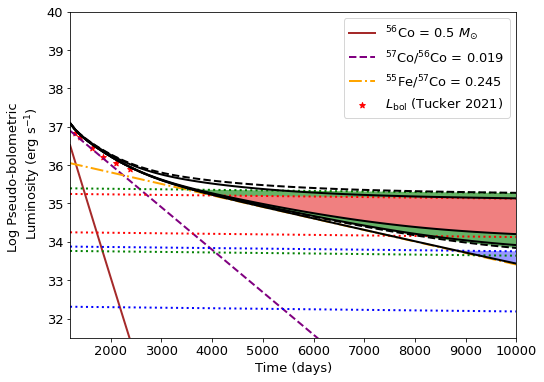

In [101]:
plotter11fe (np.linspace (1200., 10000., 100), 0.5, [1.e-4, 1.e-3, 1.15e-6, 4.25e-5, 3.27e-5, 1.4e-3])

In [116]:
def plotter19ehk (times, mass_co56, mass_ti44_array):
    atom = ["co56"]
    abundances = [mass_co56]
    abundance_ti44 = mass_ti44_array
    tgamma = [53.9]
    
    lum_list = []
    lum44_list = []

    colors = ['purple', 'brown','brown', 'black', 'black']
    styles = ['--', ':', ':', '-', '-']
        
    for i, abundance in enumerate(abundances):
        lum_list.append([luminosity(time, abundance, atom[i], 1000, tgamma[i]) for time in times])
    for k, abundance in enumerate(abundance_ti44):
        lum_list.append([luminosity(time, abundance, "ti44", 1000, 0) for time in times])

    lum_list.append([sum(x) for x in zip(*lum_list[:2])])
    lum_list.append([sum(x) for x in zip(*(lum_list[:2] + lum_list[2:3]))])
    
    labels = ['$^{56}\mathrm{Co}$','$^{44}\mathrm{Ti}$', None, None, None]
    
    fig, ax = plt.subplots (1)

    for l in range(len(lum_list)):
        ax.plot(times, np.log10(lum_list[l]), label = labels[l], linewidth = 2, color=colors[l], linestyle=styles[l])

    time_raw = [0.43,1.37,1.42,1.82,2.81,3.45,4.41,4.41,4.46,5.44,5.59,5.75,6.33,7.38,10.41,10.41,12.59,13.34,13.56,14.38,15.28,17.39,17.39,20.72,24.46,26.5,29.32,30.38,31.4,31.4,31.47,32.38,34.28,34.31,34.41,34.55,37.25,37.38,38.38,40.3,40.42,42.27,44.43,47.42,50.48,50.91,55.73,56.24,56.38,59.4,68.21,86.06,87.17,89.17,95.17,276.13,321.79,388.93]
    lum_raw = [1.83E+041,5.94E+041,6.1E+041,6.53E+041,7.76E+041,1.75E+042,1.27E+042,1.27E+042,1.22E+042,8.8E+041,8.33E+041,7.59E+041,5.91E+041,5.48E+041,6.86E+041,6.86E+041,7.63E+041,7.84E+041,8.03E+041,8.23E+041,7.54E+041,5.87E+041,5.87E+041,4.5E+041,3.49E+041,3.21E+041,2.81E+041,2.74E+041,2.72E+041,2.72E+041,2.66E+041,2.58E+041,2.45E+041,2.45E+041,2.44E+041,2.47E+041,2.17E+041,2.16E+041,2.1E+041,1.99E+041,2E+041,2.05E+041,1.95E+041,1.87E+041,1.7E+041,1.7E+041,1.52E+041,1.48E+041,1.46E+041,1.32E+041,9.83E+040,6.99E+040,6.64E+040,6.75E+040,5.39E+040,1.07E+039,4.76E+038,1.55E+038]
    
    print(len(time_raw), len(lum_raw))
    
    plt.scatter(time_raw, np.log10(lum_raw), c='red', marker= "*", label = "$L_\mathrm{bol}$ (Jacobson-Galan 2021)")
    #ax.fill_between(times, np.log10(lum_list[0]), np.log10(lum_list[1]), facecolor ='purple', alpha = 0.1)
    #ax.fill_between(times, np.log10(lum_list[2]), np.log10(lum_list[3]), facecolor ='brown', alpha = 0.1)
    plt.xlim( [times[0], times[-1]] )
    plt.ylim( [32.5, 42] )
    plt.xlabel ('Time (days)')
    plt.ylabel ('Log Pseudo-bolometric \n Luminosity (erg s$^{-1}$)')
    plt.rcParams.update ( {'font.size' : 13})
    plt.tight_layout()
    plt.legend()
    plt.savefig('SN2019ehk.png', dpi=1000)

58 58


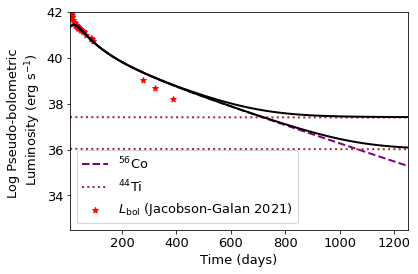

In [117]:
plotter19ehk (np.linspace (10., 1250., 100), 2.8e-2, [5.8e-3, 1.4e-1])